# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
arquivo = 'previsao_de_renda.csv'
leitura = pd.read_csv(arquivo)
df = pd.DataFrame(leitura)

In [7]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [9]:
df['mau'].head()

0    False
1    False
2    False
3    False
4    False
Name: mau, dtype: bool

In [13]:
# Converter booleanos para números inteiros (0 ou 1)
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(int)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(int)
df['mau'] = df['mau'].astype(int)

# Corrigir valores nulos em 'tempo_emprego' assumindo 0 para facilitar a análise
df['tempo_emprego'].fillna(0, inplace=True)

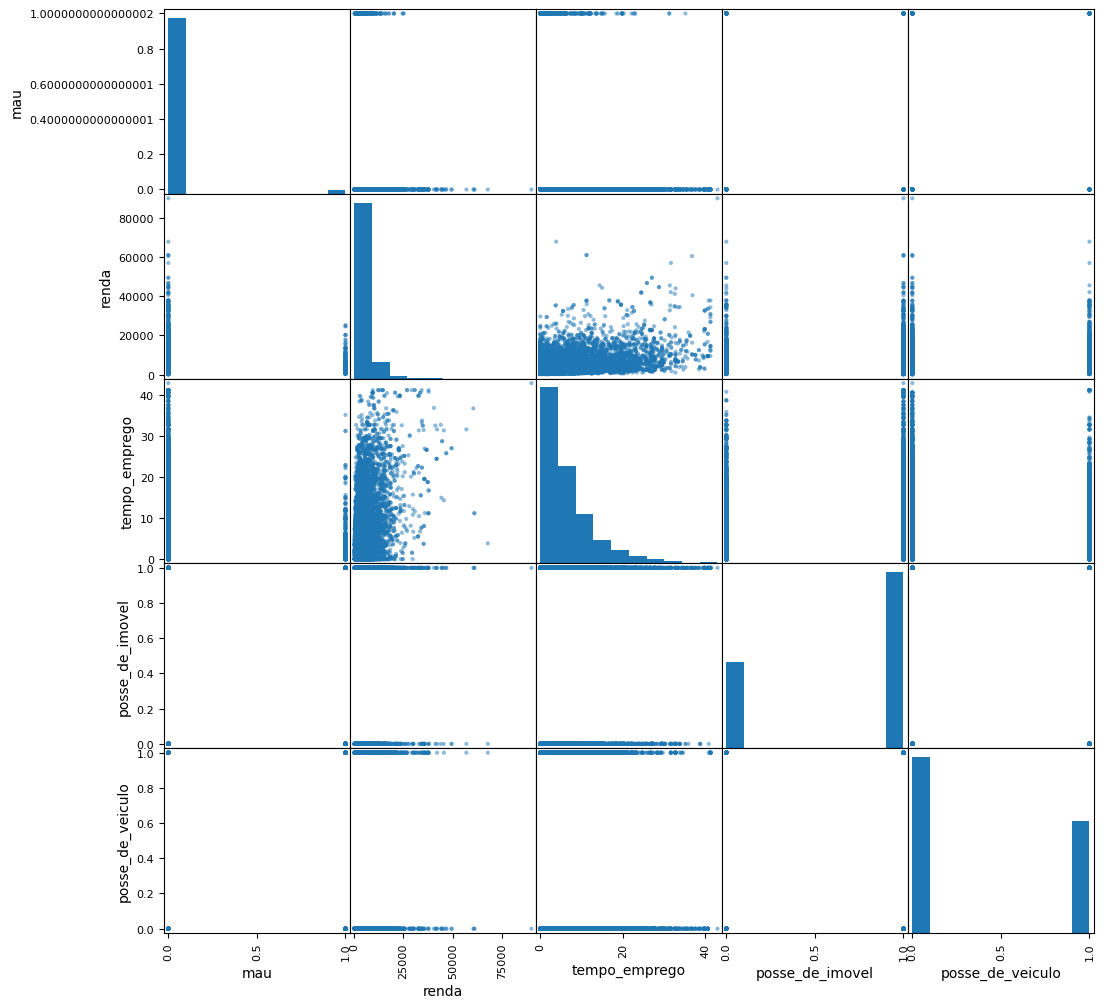

In [14]:
pd.plotting.scatter_matrix(df[['mau', 'renda', 'tempo_emprego', 'posse_de_imovel', 'posse_de_veiculo']], figsize=(12, 12))
plt.show()

#### A partir do gráfico de matriz de dispersão acima plotado, compreende-se que:
    - A correlação entre mau e renda é nítida. Os maus pagadores, em sua maioria, estão concentrados na faixa de renda de até 25.000;
    - Quando relacionamos o 'mau' com o tempo de emprego, percebemos a relação entre o maior tempo com o maior índice de adimplência. A maioria dos mau pagadores estão praticamente concentrados na faixa inicial do tempo de emprego (menor tempo);
    - Quanto às demais variáveis, não foi possível encontrar correlação.

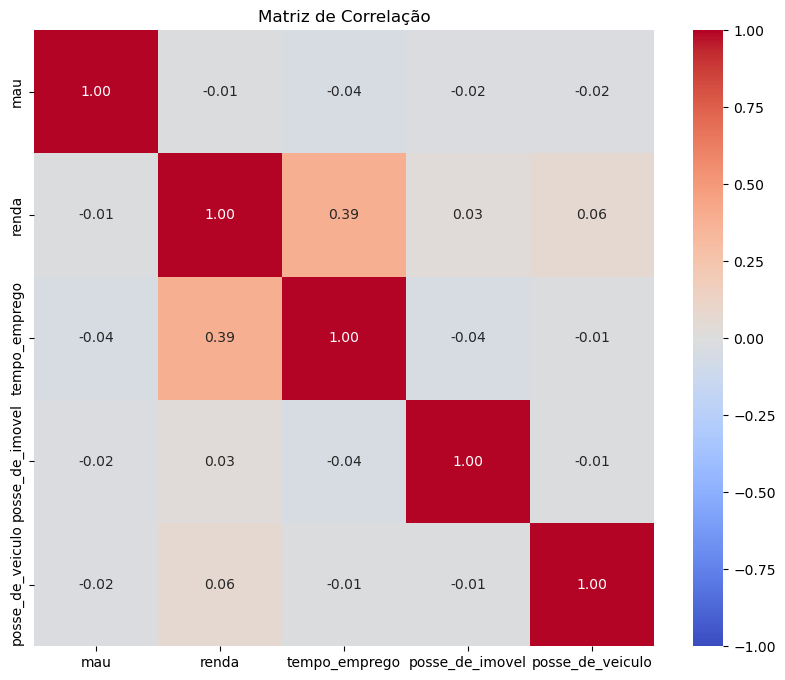

In [15]:
corr_matrix = df[['mau', 'renda', 'tempo_emprego', 'posse_de_imovel', 'posse_de_veiculo']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

 #### Já esse gráfico não mostra tão bem as relações indicadas no campo acima. Ele indica, entretanto, correlação entre outras variáveis. 
     - A maior é a correlação entre tempo de emprego e renda, o que pode indicar que a instituição financeira possa priorizar, na concessão de crédito, aqueles que possuem mais tempo de emprego. 

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

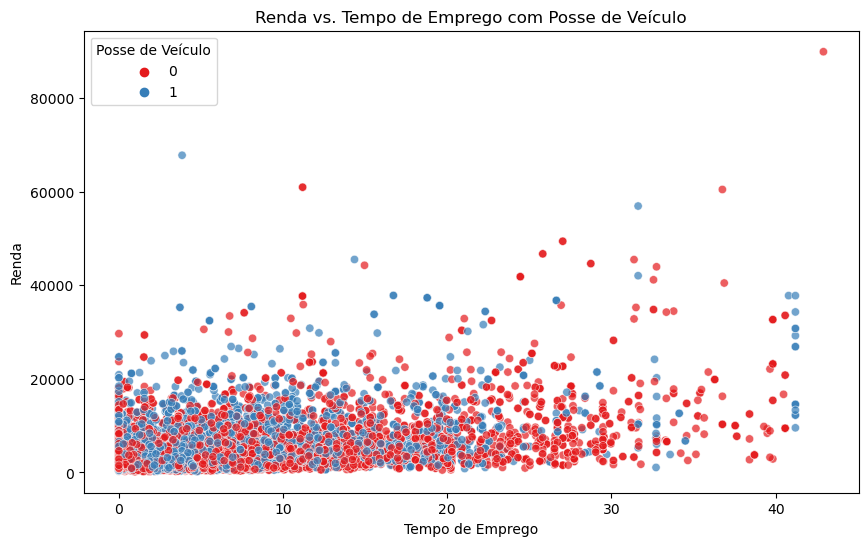

In [20]:
# Plotando o gráfico de dispersão com renda, posse de veículo e tempo de emprego
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempo_emprego', y='renda', hue='posse_de_veiculo', palette='Set1', alpha=0.7)
plt.title('Renda vs. Tempo de Emprego com Posse de Veículo')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.legend(title='Posse de Veículo')
plt.show()


3) Na sua opinião, há outliers na variável renda?

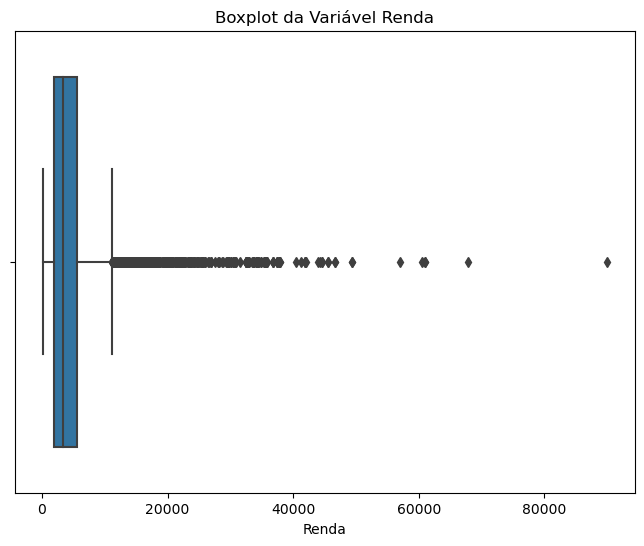

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['renda'])
plt.title('Boxplot da Variável Renda')
plt.xlabel('Renda')
plt.show()

Resposta:
   #### Dado que no gráfico plotado existem pontos que estão soltos, fora da concentração, conclui-se que há, de fato, outliers na variável renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [27]:
# Calcular logaritmo da variável renda
df['log_renda'] = np.log(df['renda'])
df['log_renda']

0        8.122442
1        8.715411
2        8.640999
3        8.888300
4        8.298383
           ...   
14995    7.084469
14996    7.831689
14997    7.369506
14998    8.850144
14999    6.901596
Name: log_renda, Length: 15000, dtype: float64

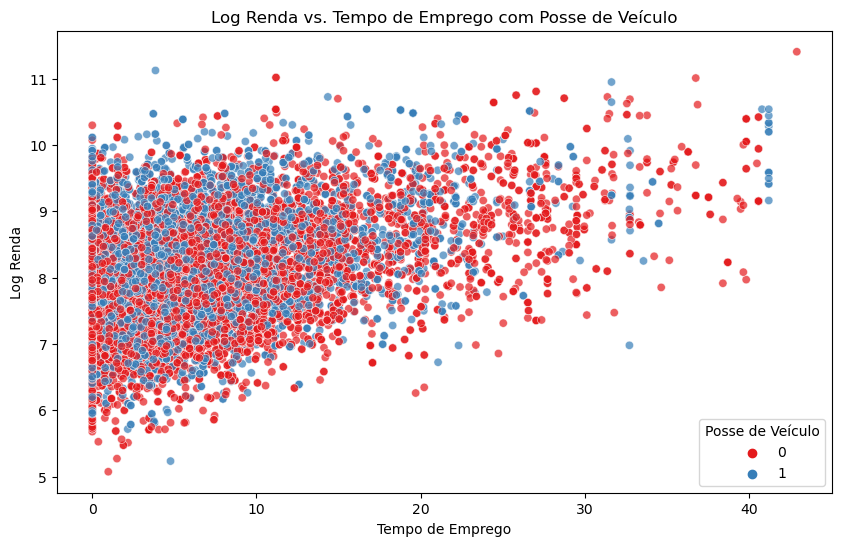

In [28]:
# Plotando o gráfico de dispersão com log_renda, tempo de emprego e posse de veículo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempo_emprego', y='log_renda', hue='posse_de_veiculo', palette='Set1', alpha=0.7)
plt.title('Log Renda vs. Tempo de Emprego com Posse de Veículo')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Log Renda')
plt.legend(title='Posse de Veículo')
plt.show()


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

### A visualização dos dados ficou mais concentrada. São menos pontos fora da concentração com as demais variáveis, portanto, melhorou análise.